In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./titanic.csv').dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


<AxesSubplot:ylabel='Frequency'>

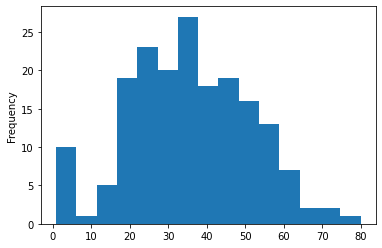

In [33]:
df['Age'].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

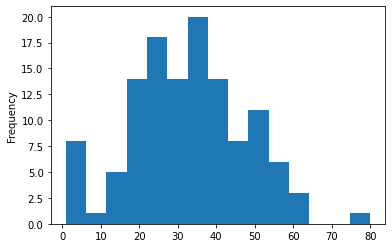

In [35]:
df[df['Survived'] == 1]['Age'].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

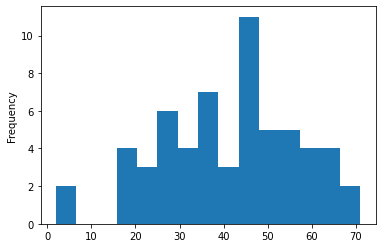

In [36]:
df[df['Survived'] == 0]['Age'].plot.hist(bins=15)

In [34]:
df[df['Survived'] == 1]['Age'].to_csv('titanic_age_survived.csv')
df[df['Survived'] == 0]['Age'].to_csv('titanic_age_survived.csv')
df['Age'].to_csv('titanic_age_both.csv')